## Bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Funções

In [ ]:
def model_JCAL(rho_0, alpha_inf, sigma_rf,
              phi, eta, lamb, omega,
              gamma, P_0, Pr, lamb_linha,
              q_0, q_0_linha):
   omega=omega*2*np.pi
   rho_omega = ((rho_0*alpha_inf)/1)*(1+(((eta*phi)/(1j*omega*rho_0*q_0*alpha_inf))*np.sqrt(1+(1j*((4*omega*rho_0*(alpha_inf**2)*(q_0**2))/((eta)*(lamb**2)*(phi**2)))))))
   K_omega = (gamma*P_0)/(gamma - ((gamma-1)*((1+(((phi*eta)/(1j*omega*Pr*rho_0*q_0_linha))*np.sqrt(1+((1j*4*omega*Pr*rho_0*(q_0_linha**2))/(eta*(lamb_linha**2)*(phi**2))))))**(-1))))
   return rho_omega, K_omega

In [ ]:
def calc_Zrm(rho, K, omega, dm, rho_s, Z_0, c_0, D):
  omega=omega*2*np.pi
  k_0 =(omega)/c_0
  Zc = np.sqrt(rho*K)
  kc = omega*np.sqrt(rho/K)
  Zcam = -1j*Zc*(1/np.tan(kc*dm))
  Zrm = 0
  Zrm += 1j*omega*rho_s
  Zrm += ((-1j*Zcam*Z_0*(1/np.tan(k_0*(D-dm))))+(Z_0**2))/(Zcam-(1j*Z_0*(1/np.tan(k_0*(D-dm)))))
  return Zrm

## Definição de Parâmetros

In [ ]:
## Propriedades do Material (Melamina)
sigma_rf = 12627 #Resistividade ao Fluxo
phi = 0.9 #Porosidade
alpha_inf = 1 #Tortuosidade
lamb = 91e-6 #Comprimento Característico Viscoso
lamb_linha = 148e-6 #Comprimento Característico Térmico
rho_m = 10 #Densidade do Material
q_0 = 14.57e-10 #Permeabilidade Estática Viscosa
q_0_linha = 14.57e-10 #Permeabilidade Térmica

In [ ]:
## Propriedades do Fluido (Ar)
P_0 = 101320 #Pressão Atmosférica
rho_0 = 1.21 #Densidade do Fluido
c_0 = 343.6 #Velocidade do Som
gamma = 1.4 #Razão entre Capacidades Térmicas
eta = 1.84e-5 #Viscosidade Dinãmica do ar
Pr = 0.71 #Número de Prandtl
Z_0 = rho_0*c_0 #Impedância do ar

## Calculando Parâmetros do Material Poroso

In [ ]:
omega = np.arange(1, 2000, 1)
## Cáluclo da Densidade Efetiva e Módulo de Compressinilidade Efetivo - Modelo JCAL
rho, K = model_JCAL(rho_0=rho_0,
                    alpha_inf=alpha_inf,
                    sigma_rf=sigma_rf,
                    phi=phi,
                    eta=eta,
                    lamb=lamb,
                    omega=omega,
                    gamma=gamma,
                    P_0=P_0,
                    Pr=Pr,
                    lamb_linha=lamb_linha,
                    q_0=q_0,
                    q_0_linha=q_0_linha)

## Caso 1: Variando a Espessura da Cavidade

In [ ]:
## Definindo os Parâmetros do Absorverdor
rho_s = 0.56 #Densidade da Superfície
all_D = [0.5e-2, 1e-2, 2e-2, 15e-2] #Espessuras da Cavidade
alpha_case1 = []
for D in all_D:
  dm = 0.8*D
  Zrm_var = calc_Zrm(rho=rho,
              K=K,
              omega=omega,
              dm=dm,
              rho_s=rho_s,
              Z_0=Z_0,
              c_0=c_0,
              D=D)
  alpha_var = 1-(np.abs((Zrm_var-Z_0)/(Zrm_var+Z_0))**2)
  alpha_case1.append(alpha_var)

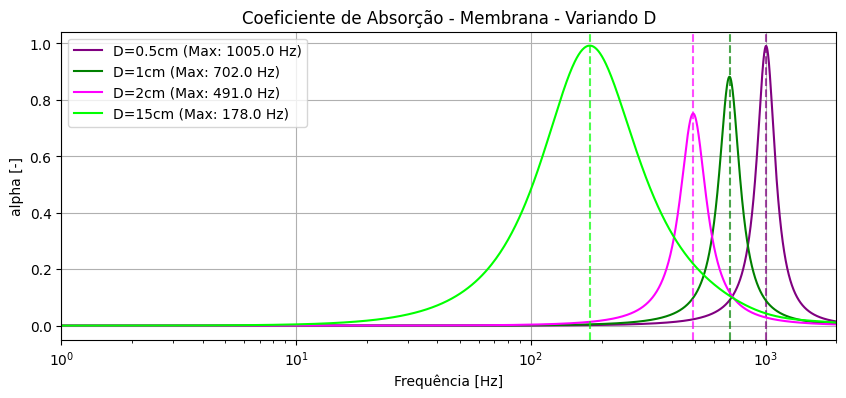

In [ ]:
colors = ['purple', 'green', 'magenta', 'lime']
labels = ['D=0.5cm', 'D=1cm', 'D=2cm', 'D=15cm']
## Plot da Velocidade de Propagação - Parte Real e Imaginária
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
# Gráfico da parte real
for i, alpha in enumerate(alpha_case1):
  max_index = np.argmax(alpha)
  max_frequency = omega[max_index]
  ax.axvline(max_frequency, color=colors[i], linestyle='--', alpha=0.7)
  labels[i] += f' (Max: {max_frequency:.1f} Hz)'
  ax.semilogx(omega, alpha, label=labels[i], color=colors[i])
ax.set_title('Coeficiente de Absorção - Membrana - Variando D')
ax.set_xlabel('Frequência [Hz]')
ax.set_ylabel('alpha [-]')
ax.set_xlim([1,2000])
# ax1.set_ylim([1,1.5])
ax.grid(True)
ax.legend()

## Caso 2: Variando a Espessura do Material Poroso

In [ ]:
## Definindo os Parâmetros do Absorverdor
rho_s = 0.56 #Densidade da Superfície
D = 10e-2 #Espessura da Cavidade
all_dm = [2e-3, 3e-3, 4e-3, 5e-3, 7e-3, 9e-3] #Espessuras da Material Poroso
alpha_case2 = []
for dm in all_dm:
  Zrm_var = calc_Zrm(rho=rho,
              K=K,
              omega=omega,
              dm=dm,
              rho_s=rho_s,
              Z_0=Z_0,
              c_0=c_0,
              D=D)
  alpha_var = 1-(np.abs((Zrm_var-Z_0)/(Zrm_var+Z_0))**2)
  alpha_case2.append(alpha_var)

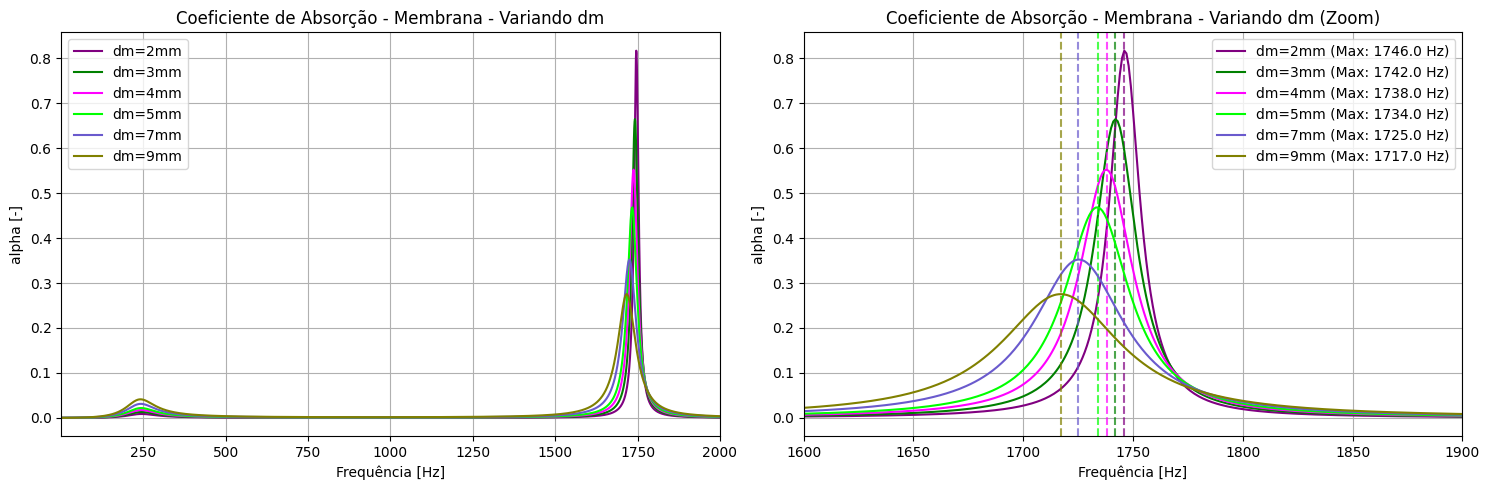

In [ ]:
## Plotagem dos Coeficientes de Absorção
colors = ['purple', 'green', 'magenta', 'lime', 'slateblue', 'olive']
labels = ['dm=2mm','dm=3mm','dm=4mm','dm=5mm','dm=7mm','dm=9mm']
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
for i, alpha in enumerate(alpha_case2):
    axs[0].plot(omega, alpha, label=labels[i], color=colors[i])
axs[0].set_title('Coeficiente de Absorção - Membrana - Variando dm')
axs[0].set_xlabel('Frequência [Hz]')
axs[0].set_ylabel('alpha [-]')
axs[0].set_xlim([1, 2000])
axs[0].grid(True)
axs[0].legend()
for i, alpha in enumerate(alpha_case2):
    max_index = np.argmax(alpha)
    max_frequency = omega[max_index]
    labels[i] += f' (Max: {max_frequency:.1f} Hz)'
    axs[1].axvline(max_frequency, color=colors[i], linestyle='--', alpha=0.7)
    axs[1].plot(omega, alpha, label=labels[i], color=colors[i])
axs[1].set_title('Coeficiente de Absorção - Membrana - Variando dm (Zoom)')
axs[1].set_xlabel('Frequência [Hz]')
axs[1].set_ylabel('alpha [-]')
axs[1].set_xlim([1600, 1900])
axs[1].grid(True)
axs[1].legend()
plt.tight_layout()
plt.show()

## Caso 3: Variando a Densidade da Membrana

In [ ]:
## Definindo os Parâmetros do Absorverdor
all_rho_s = [0.24, 0.56, 1.4] #Densidade da Superfície
D = 8e-2 #Espessura da Cavidade
dm = 0.8*D #Espessuras da Material Poroso
alpha_case3 = []
for rho_s in all_rho_s:
  Zrm_var = calc_Zrm(rho=rho,
              K=K,
              omega=omega,
              dm=dm,
              rho_s=rho_s,
              Z_0=Z_0,
              c_0=c_0,
              D=D)
  alpha_var = 1-(np.abs((Zrm_var-Z_0)/(Zrm_var+Z_0))**2)
  alpha_case3.append(alpha_var)

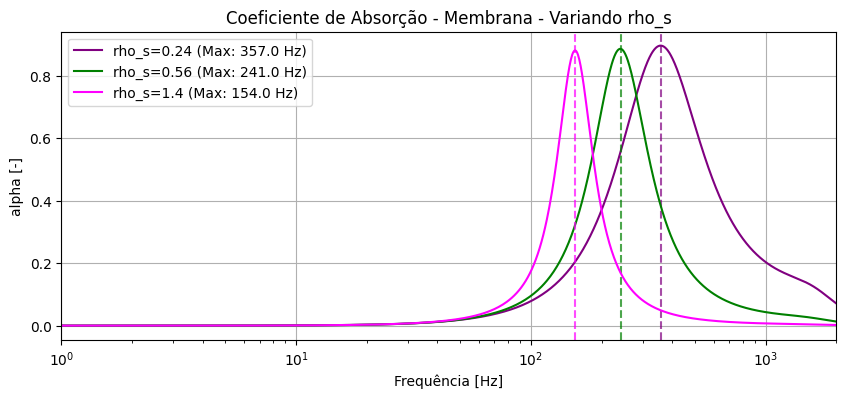

In [ ]:
colors = ['purple', 'green', 'magenta']
labels = ['rho_s=0.24', 'rho_s=0.56', 'rho_s=1.4']
## Plot da Velocidade de Propagação - Parte Real e Imaginária
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
# Gráfico da parte real
for i, alpha in enumerate(alpha_case3):
  max_index = np.argmax(alpha)
  max_frequency = omega[max_index]
  ax.axvline(max_frequency, color=colors[i], linestyle='--', alpha=0.7)
  labels[i] += f' (Max: {max_frequency:.1f} Hz)'
  ax.semilogx(omega, alpha, label=labels[i], color=colors[i])
ax.set_title('Coeficiente de Absorção - Membrana - Variando rho_s')
ax.set_xlabel('Frequência [Hz]')
ax.set_ylabel('alpha [-]')
ax.set_xlim([1,2000])
# ax1.set_ylim([1,1.5])
ax.grid(True)
ax.legend()